<a href="https://colab.research.google.com/github/scottslusher/Alphabet-Soup/blob/main/inventory_projection_fb_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pystan
!pip install fbprophet

In [73]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from fbprophet import Prophet
import datetime as dt
from datetime import datetime
%matplotlib inline

In [82]:
from google.colab import files
uploaded = files.upload()

Saving pivetal_latex_gloves.csv to pivetal_latex_gloves.csv


In [83]:
df_orig = pd.read_csv('pivetal_latex_gloves.csv', parse_dates=True, infer_datetime_format=True)
df_orig.dropna(inplace=True)
item_list = df_orig['Item#'].unique()

print(df_orig.head())
print(item_list[:5])

              InvoiceDate  BillingDocument       Item#  \
0  11/25/2019 12:00:00 AM     3.002073e+09  78937581.0   
1  11/26/2019 12:00:00 AM     3.002090e+09  78937581.0   
2  11/26/2019 12:00:00 AM     3.002094e+09  78937581.0   
3  11/26/2019 12:00:00 AM     3.002095e+09  78937581.0   
4  11/26/2019 12:00:00 AM     3.002095e+09  78937581.0   

                               Description Manufacturer  Qty  SALES   GM$  
0  GLOVE SURG PF LATEX STER SZ 7 50 PR PIV      PIVETAL  1.0  29.68  9.82  
1  GLOVE SURG PF LATEX STER SZ 7 50 PR PIV      PIVETAL  1.0  29.68  9.82  
2  GLOVE SURG PF LATEX STER SZ 7 50 PR PIV      PIVETAL  1.0  29.68  9.82  
3  GLOVE SURG PF LATEX STER SZ 7 50 PR PIV      PIVETAL  1.0  29.68  9.82  
4  GLOVE SURG PF LATEX STER SZ 7 50 PR PIV      PIVETAL  1.0  29.68  9.82  
[78937581. 78937583. 78937584. 78937580. 78937579.]


In [85]:
finalized_list = []

for i in range(len(item_list)):
  try:
    item_num = item_list[i]

    df = df_orig.loc[df_orig['Item#'] == item_list[i]]

    df = df[['InvoiceDate', 'Qty']].copy()
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    df_grouped = df.groupby(df.InvoiceDate).sum()
    df_grouped.reset_index(inplace=True)
    df_grouped.sort_values('InvoiceDate', inplace=True)
    df_grouped['t_qty'] = df_grouped['Qty'].cumsum()
    df = df_grouped[['InvoiceDate', 't_qty']].copy()

    df_sliced = df.loc[df['InvoiceDate'] < '2020-03-01']

    df_sliced.columns = ['ds', 'y']

    model = Prophet()
    model.fit(df_sliced)

    future_trends = model.make_future_dataframe(periods=173, freq='D')
    forecast_trends = model.predict(future_trends)

    forecast_trends = forecast_trends.set_index(["ds"])

    forecast = forecast_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-173:,:]
    estimated_total = forecast['yhat'][-1] - forecast['yhat'][0]
    
    data = {"Item #": item_num, "Estimated 8 Month Qty":estimated_total}
    finalized_list.append(data)
  except:
    pass

final_df = pd.DataFrame(finalized_list)
final_df



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

,Item #,Estimated 8 Month Qty
0,78937581.0,3018.568871
1,78937583.0,2076.210820
2,78937584.0,2536.473065
3,78937580.0,5732.840038
4,78937579.0,1672.745865
5,78937585.0,332.901986
6,78937578.0,265.190480
7,21294620.0,72.062310
8,21294623.0,62.080564
9,21294622.0,146.473176


In [56]:
df = df[['InvoiceDate', 'Qty']].copy()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceDate,Qty
0,2017-05-01,1.0
1,2017-05-01,20.0
2,2017-05-01,1.0
3,2017-05-01,10.0
4,2017-05-01,1.0


In [57]:
df_grouped = df.groupby(df.InvoiceDate).sum()
df_grouped.reset_index(inplace=True)
df_grouped.sort_values('InvoiceDate', inplace=True)
df_grouped['t_qty'] = df_grouped['Qty'].cumsum()
df = df_grouped[['InvoiceDate', 't_qty']].copy()
df.tail()

,InvoiceDate,t_qty
926,2021-04-08,162991.0
927,2021-04-12,162993.0
928,2021-04-20,163001.0
929,2021-05-13,163002.0
930,2021-05-24,163003.0


In [58]:
df_sliced = df.loc[df['InvoiceDate'] < '2020-03-01']
df_sliced.tail()

,InvoiceDate,t_qty
717,2020-02-24,129516.0
718,2020-02-25,129917.0
719,2020-02-26,130206.0
720,2020-02-27,130250.0
721,2020-02-28,130373.0


In [59]:
df_sliced.columns = ['ds', 'y']
df_sliced

,ds,y
0,2017-05-01,366.0
1,2017-05-02,579.0
2,2017-05-03,823.0
3,2017-05-04,934.0
4,2017-05-05,985.0
...,...,...
717,2020-02-24,129516.0
718,2020-02-25,129917.0
719,2020-02-26,130206.0
720,2020-02-27,130250.0


In [60]:
df_sliced.shape

(722, 2)

In [61]:
model = Prophet()

In [62]:
model.fit(df_sliced)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
future_trends = model.make_future_dataframe(periods=365, freq='D')
future_trends

,ds
0,2017-05-01
1,2017-05-02
2,2017-05-03
3,2017-05-04
4,2017-05-05
...,...
1082,2021-02-23
1083,2021-02-24
1084,2021-02-25
1085,2021-02-26


In [64]:
forecast_trends = model.predict(future_trends)
forecast_trends

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-01,132.228417,412.400053,640.753158,132.228417,132.228417,398.249338,398.249338,398.249338,-72.831156,-72.831156,-72.831156,471.080494,471.080494,471.080494,0.0,0.0,0.0,530.477755
1,2017-05-02,226.461964,621.711593,845.602711,226.461964,226.461964,506.829928,506.829928,506.829928,30.182730,30.182730,30.182730,476.647198,476.647198,476.647198,0.0,0.0,0.0,733.291892
2,2017-05-03,320.695512,783.357460,1023.979451,320.695512,320.695512,582.266672,582.266672,582.266672,99.706511,99.706511,99.706511,482.560160,482.560160,482.560160,0.0,0.0,0.0,902.962183
3,2017-05-04,414.929059,859.562092,1093.756865,414.929059,414.929059,562.903760,562.903760,562.903760,74.253361,74.253361,74.253361,488.650400,488.650400,488.650400,0.0,0.0,0.0,977.832820
4,2017-05-05,509.162607,963.192392,1199.673578,509.162607,509.162607,574.924047,574.924047,574.924047,80.182662,80.182662,80.182662,494.741385,494.741385,494.741385,0.0,0.0,0.0,1084.086654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2021-02-23,179867.292960,171894.957196,187889.505186,172010.562094,188026.633518,-156.129808,-156.129808,-156.129808,30.182730,30.182730,30.182730,-186.312537,-186.312537,-186.312537,0.0,0.0,0.0,179711.163152
1083,2021-02-24,180004.217444,172063.534490,188106.302169,172115.879355,188208.760569,-79.995765,-79.995765,-79.995765,99.706511,99.706511,99.706511,-179.702276,-179.702276,-179.702276,0.0,0.0,0.0,179924.221679
1084,2021-02-25,180141.141929,172122.931740,188273.543450,172222.545039,188379.578892,-98.503656,-98.503656,-98.503656,74.253361,74.253361,74.253361,-172.757016,-172.757016,-172.757016,0.0,0.0,0.0,180042.638273
1085,2021-02-26,180278.066413,172237.120021,188543.796131,172329.210723,188566.856558,-85.256984,-85.256984,-85.256984,80.182662,80.182662,80.182662,-165.439646,-165.439646,-165.439646,0.0,0.0,0.0,180192.809429


In [65]:
forecast_trends.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1082,2021-02-23,179867.292960,171894.957196,187889.505186,172010.562094,188026.633518,-156.129808,-156.129808,-156.129808,30.182730,30.182730,30.182730,-186.312537,-186.312537,-186.312537,0.0,0.0,0.0,179711.163152
1083,2021-02-24,180004.217444,172063.534490,188106.302169,172115.879355,188208.760569,-79.995765,-79.995765,-79.995765,99.706511,99.706511,99.706511,-179.702276,-179.702276,-179.702276,0.0,0.0,0.0,179924.221679
1084,2021-02-25,180141.141929,172122.931740,188273.543450,172222.545039,188379.578892,-98.503656,-98.503656,-98.503656,74.253361,74.253361,74.253361,-172.757016,-172.757016,-172.757016,0.0,0.0,0.0,180042.638273
1085,2021-02-26,180278.066413,172237.120021,188543.796131,172329.210723,188566.856558,-85.256984,-85.256984,-85.256984,80.182662,80.182662,80.182662,-165.439646,-165.439646,-165.439646,0.0,0.0,0.0,180192.809429
1086,2021-02-27,180414.990898,172188.612776,188461.598294,172440.158864,188754.679998,-248.947774,-248.947774,-248.947774,-91.236370,-91.236370,-91.236370,-157.711404,-157.711404,-157.711404,0.0,0.0,0.0,180166.043124


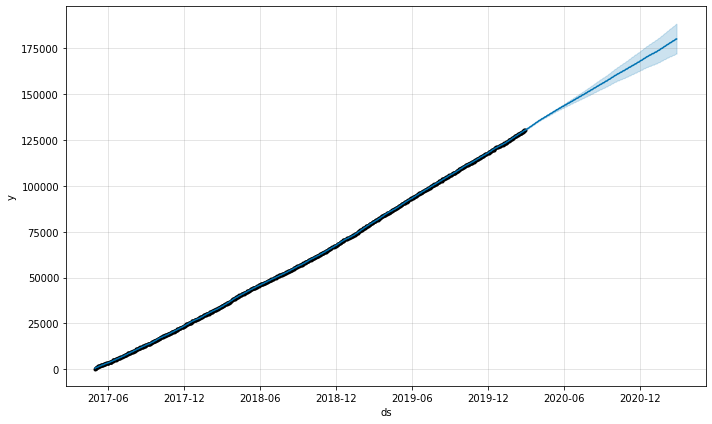

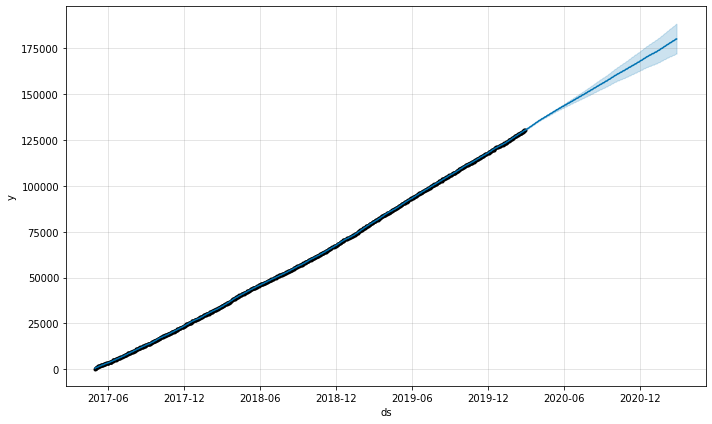

In [66]:
model.plot(forecast_trends)

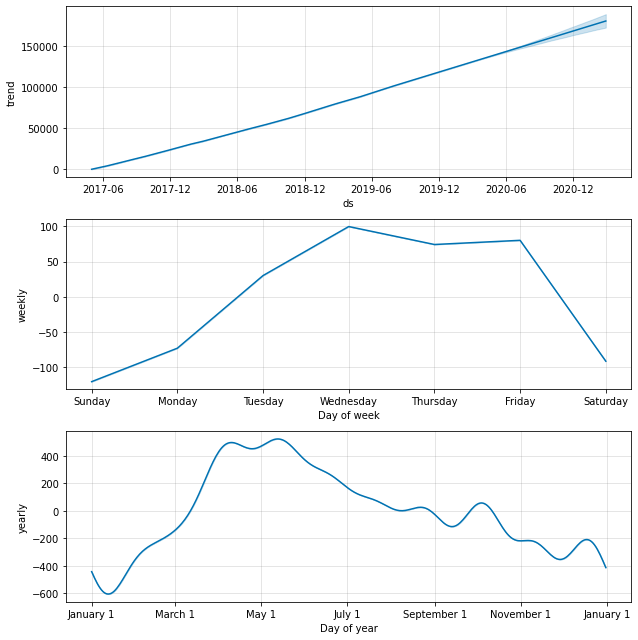

In [67]:
# Use the plot_components function to visualize the forecast results.
figures = model.plot_components(forecast_trends)

In [68]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(["ds"])
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2017-05-01,132.228417,412.400053,640.753158,132.228417,132.228417,398.249338,398.249338,398.249338,-72.831156,-72.831156,-72.831156,471.080494,471.080494,471.080494,0.0,0.0,0.0,530.477755
2017-05-02,226.461964,621.711593,845.602711,226.461964,226.461964,506.829928,506.829928,506.829928,30.182730,30.182730,30.182730,476.647198,476.647198,476.647198,0.0,0.0,0.0,733.291892
2017-05-03,320.695512,783.357460,1023.979451,320.695512,320.695512,582.266672,582.266672,582.266672,99.706511,99.706511,99.706511,482.560160,482.560160,482.560160,0.0,0.0,0.0,902.962183
2017-05-04,414.929059,859.562092,1093.756865,414.929059,414.929059,562.903760,562.903760,562.903760,74.253361,74.253361,74.253361,488.650400,488.650400,488.650400,0.0,0.0,0.0,977.832820
2017-05-05,509.162607,963.192392,1199.673578,509.162607,509.162607,574.924047,574.924047,574.924047,80.182662,80.182662,80.182662,494.741385,494.741385,494.741385,0.0,0.0,0.0,1084.086654


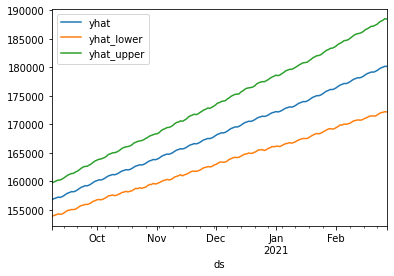

In [71]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast = forecast_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-173:,:]
forecast.plot()

In [72]:
forecast = forecast_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-173:,:]
estimated_total = forecast['yhat'][-1] - forecast['yhat'][0]
estimated_total

23366.96947769058